In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('pepsi.csv')

In [3]:
data.shape 

(7551, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-25,19.5000,19.5625,19.3750,19.3750,8.978511,1829000
1,1994-02-28,19.4375,19.8750,19.4375,19.5625,9.065403,2180400
2,1994-03-01,19.6250,19.7500,19.5000,19.5625,9.065403,2363000
3,1994-03-02,19.3125,19.5625,19.2500,19.4375,9.007477,2692400
4,1994-03-03,19.5625,19.5625,19.0625,19.0625,8.833701,2326800


In [5]:
data.index 

RangeIndex(start=0, stop=7551, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

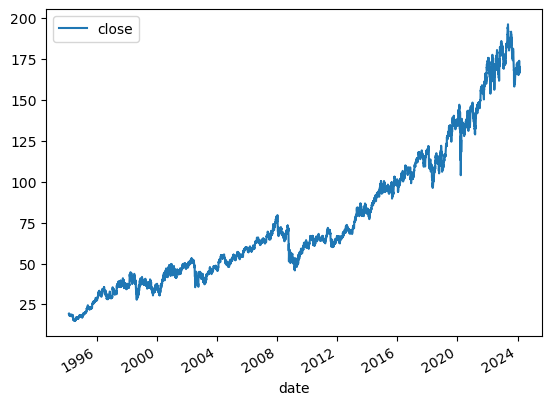

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('pepsi.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,7551.000000,7551.000000,7551.000000,7551.000000,7.551000e+03
mean,76.376287,76.991257,75.777329,76.409291,4.957180e+06
std,43.146555,43.372292,42.849736,43.117449,2.570486e+06
min,14.750000,14.898438,14.625000,14.875000,5.162000e+05
25%,43.938750,44.424999,43.419998,44.000000,3.392300e+06
50%,64.089996,64.500000,63.650002,64.110001,4.380800e+06
75%,103.250000,103.930000,102.674999,103.390004,5.765650e+06
max,196.570007,196.880005,194.949997,196.119995,4.225400e+07


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data['previousday']=data['close'].shift(1)

In [13]:
data.head() 

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
1994-02-25,19.5000,19.5625,19.3750,19.3750,1829000,19.5625,NaN
1994-02-28,19.4375,19.8750,19.4375,19.5625,2180400,19.5625,19.3750
1994-03-01,19.6250,19.7500,19.5000,19.5625,2363000,19.4375,19.5625
1994-03-02,19.3125,19.5625,19.2500,19.4375,2692400,19.0625,19.5625
1994-03-03,19.5625,19.5625,19.0625,19.0625,2326800,19.0000,19.4375


In [14]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

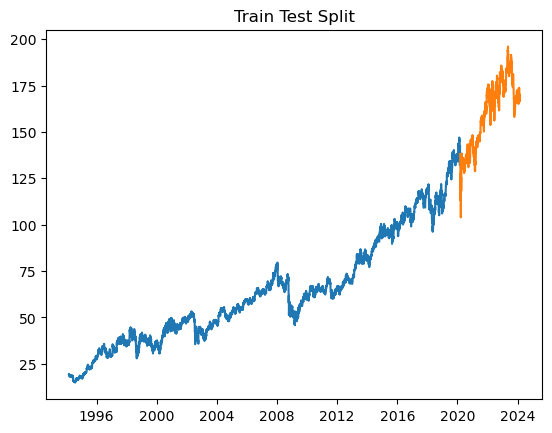

In [15]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [16]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [17]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [18]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 16.76
MAPE: 0.10
minae: 0.00
maxae: 49.80
medae: 18.51

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 16.94
MAPE: 0.10
minae: 0.01
maxae: 49.86
medae: 18.91

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 16.84
MAPE: 0.10
minae: 0.00
maxae: 49.64
medae: 18.68

Learning rate set to 0.358225
0:	learn: 19.3802999	total: 144ms	remaining: 14.3s
1:	learn: 13.0484229	total: 148ms	remaining: 7.23s
2:	learn: 8.6893372	total: 151ms	remaining: 4.87s
3:	learn: 5.8685787	total: 154ms	remaining: 3.7s
4:	learn: 4.0529212	total: 160ms	remaining: 3.04s
5:	learn: 2.9288899	total: 164ms	remaining: 2.57s
6:	learn: 2.2453995	total: 167ms	remaining: 2.22s
7:	learn: 1.8648671	total: 171ms	remaining: 1.97s
8:	learn: 1.6257917	total: 176ms	remaining: 1.78s
9:	learn: 1.5108806	total: 179ms	remaining: 1.61s
10:	learn: 1.4206873	total: 182ms	

#### Retrain the best Model(Extreme Gradient Boosting)

In [19]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [20]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [21]:
#combined_1.plot();
combined_2

,close,0
date,,
2020-03-05,138.100006,139.178271
2020-03-06,137.259995,136.282162
2020-03-09,130.160004,131.078405
2020-03-10,134.139999,132.477253
2020-03-11,129.750000,130.818920
...,...,...
2024-02-16,166.320007,146.297916
2024-02-20,168.649994,146.229169
2024-02-21,168.830002,146.364237


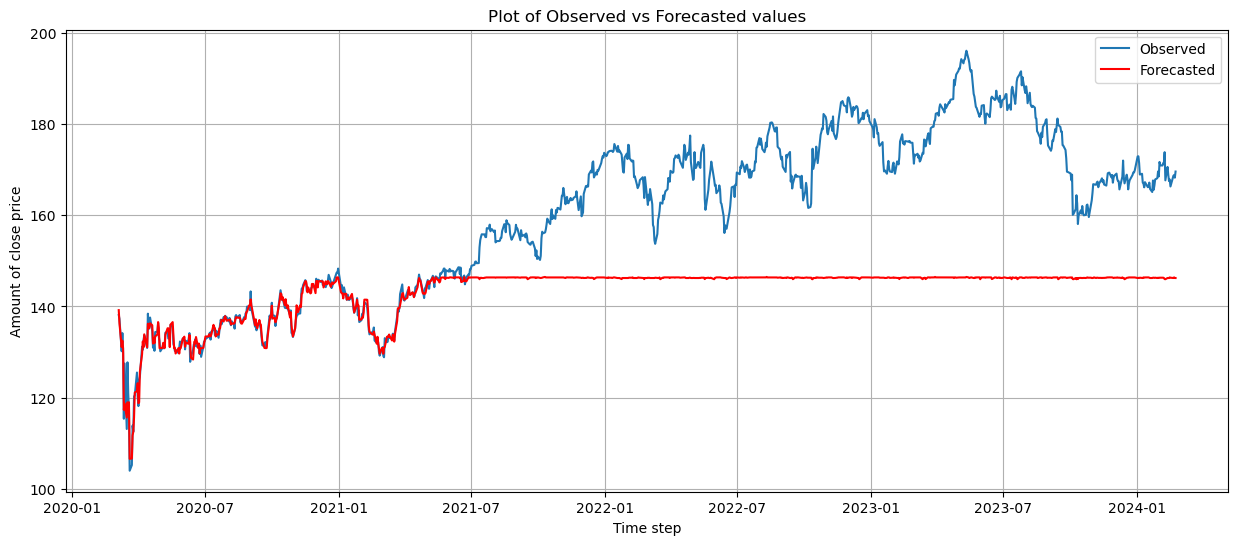

In [22]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [23]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [24]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [25]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [26]:
data['RSI']= computeRSI(data['close'], 14)

In [27]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
1994-02-25,19.5000,19.5625,19.3750,19.3750,1829000,19.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-02-28,19.4375,19.8750,19.4375,19.5625,2180400,19.5625,19.3750,1.004815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-01,19.6250,19.7500,19.5000,19.5625,2363000,19.4375,19.5625,1.000000,38.9375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-02,19.3125,19.5625,19.2500,19.4375,2692400,19.0625,19.5625,0.996795,39.1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-03,19.5625,19.5625,19.0625,19.0625,2326800,19.0000,19.4375,0.990260,39.0000,0.982603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.shape 

(7551, 19)

In [29]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
1994-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3750,NaN
1994-02-28,1.004815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.5625,NaN
1994-03-01,1.000000,38.9375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.5625,NaN
1994-03-02,0.996795,39.1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.4375,NaN
1994-03-03,0.990260,39.0000,0.982603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0625,NaN


In [30]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [31]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [32]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [33]:
new_data=new_data.dropna()
new_data.shape 

(6551, 16)

In [34]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
1998-02-11,1.000878,71.3125,1.003168,177.3750,0.985193,2169.8750,0.983444,9052.4375,1.301872,27348.1875,35.6250,-0.022298,35.645833,35.578125,27.356456,36.047896
1998-02-12,1.005236,71.1875,1.009464,177.5625,0.995822,2169.6250,0.993384,9056.1875,1.314786,27364.4375,36.0000,-0.001733,35.729167,35.734375,27.365082,36.045560
1998-02-13,1.006897,71.6250,1.017067,178.3125,1.010060,2169.0625,1.006765,9059.9375,1.332223,27380.8750,36.5000,0.001715,36.041667,35.921875,27.374190,36.067728
1998-02-17,0.988745,72.5000,0.994774,179.4375,0.987918,2168.1875,0.984048,9063.6875,1.301795,27397.8125,35.6875,-0.032203,36.062500,35.953125,27.382470,36.049180
1998-02-18,0.993833,72.1875,0.984293,179.3750,0.976849,2167.4375,0.971797,9066.5000,1.285078,27414.0625,35.2500,-0.024221,35.812500,35.859375,27.390299,36.010196


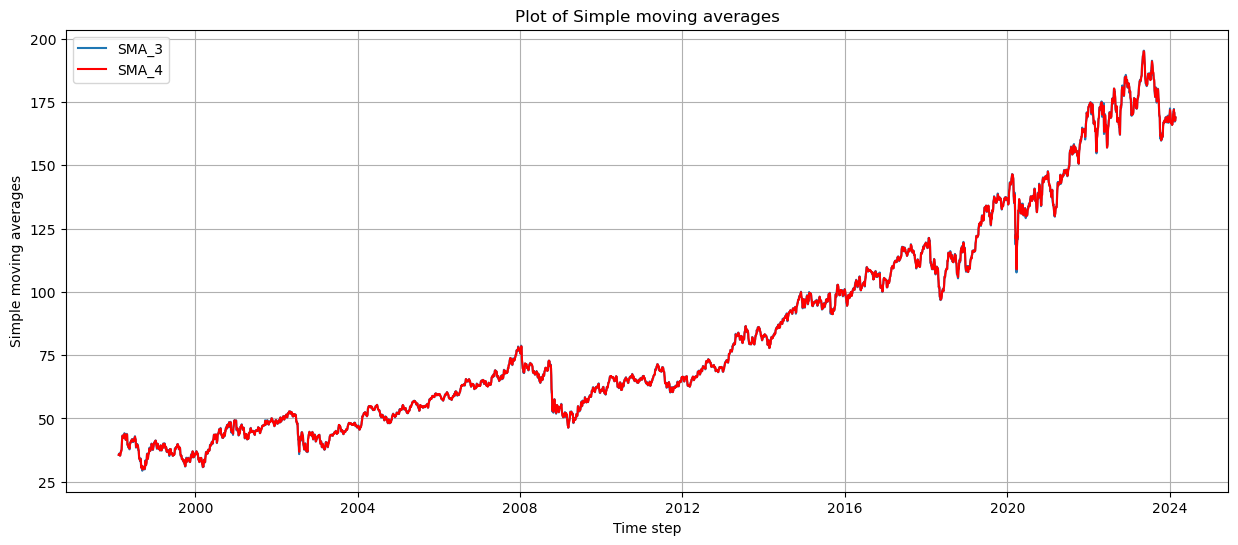

In [35]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

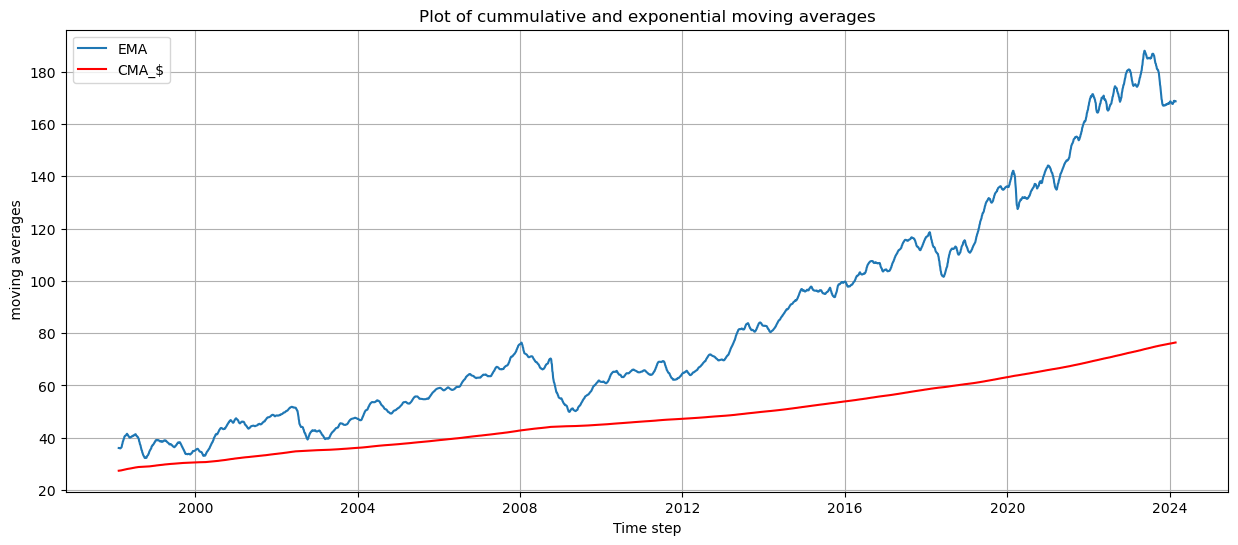

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

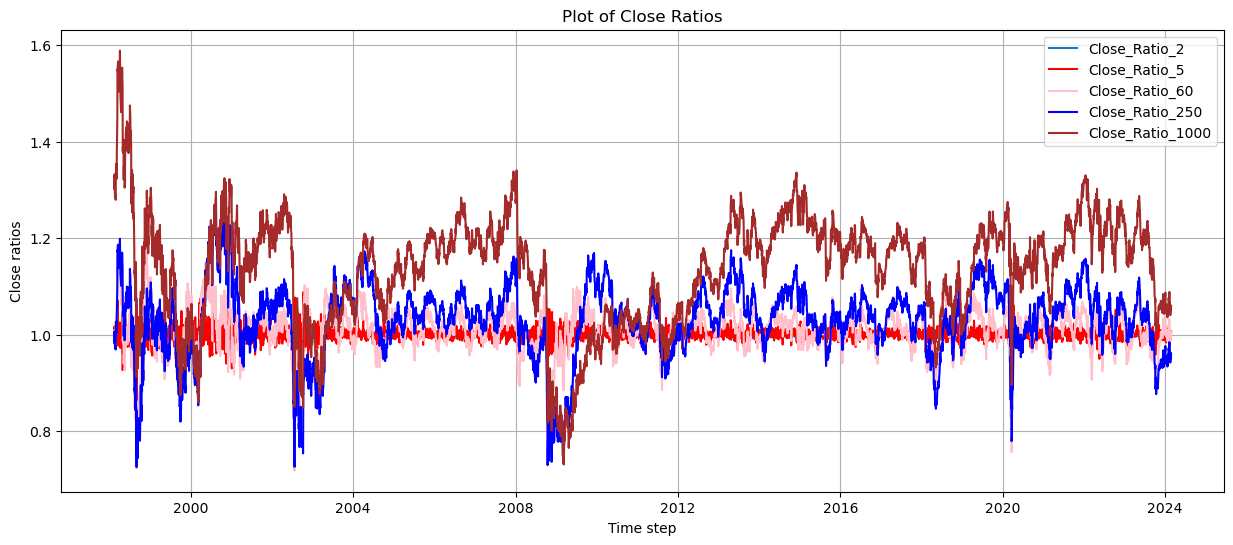

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

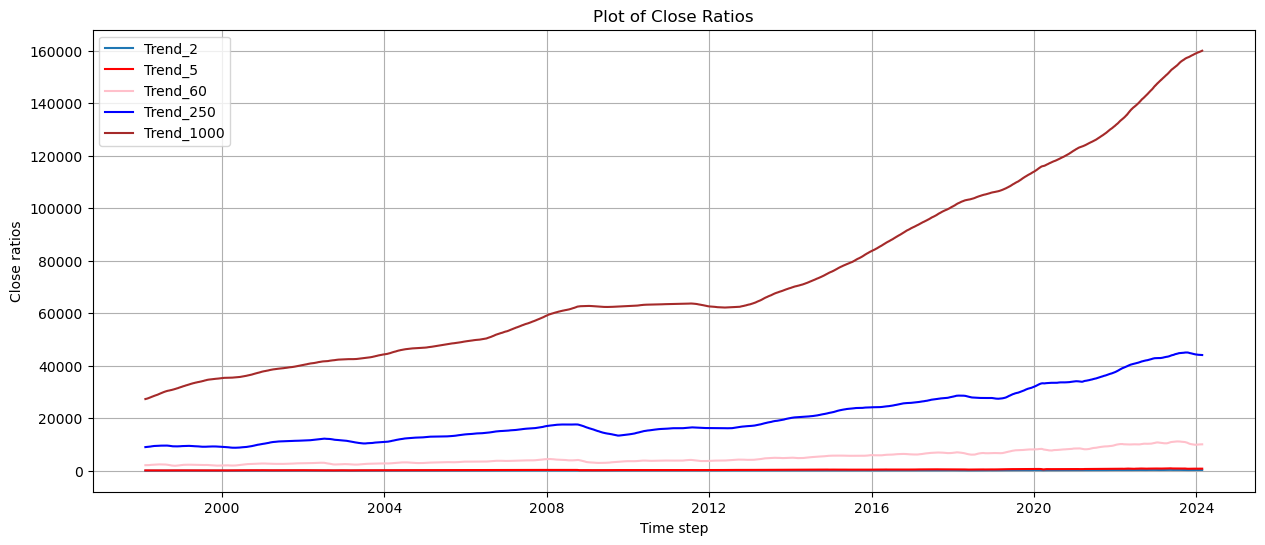

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [39]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday'] 

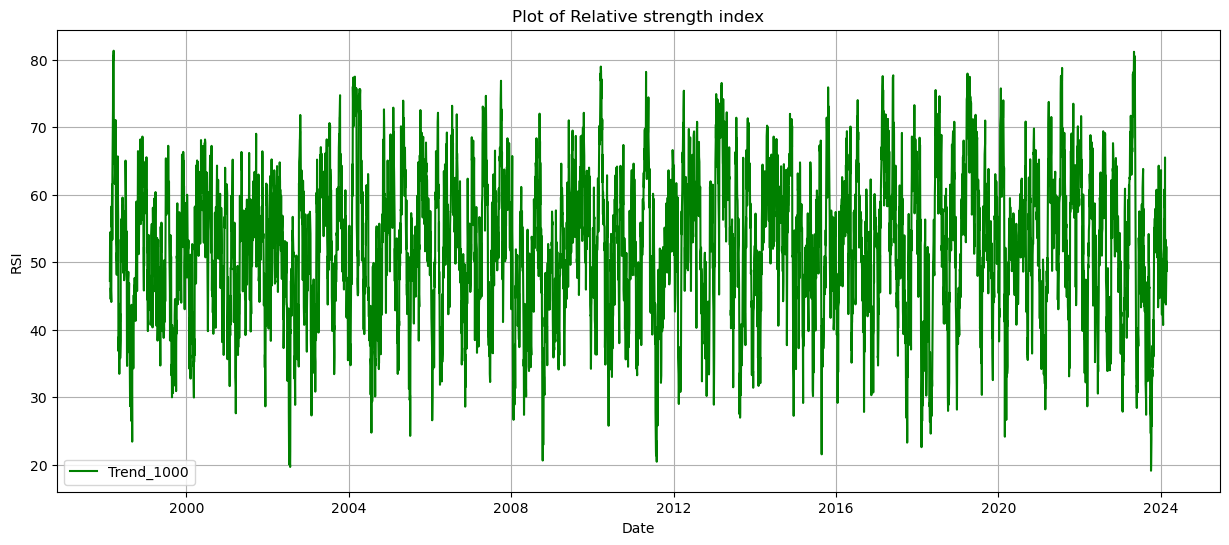

In [40]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

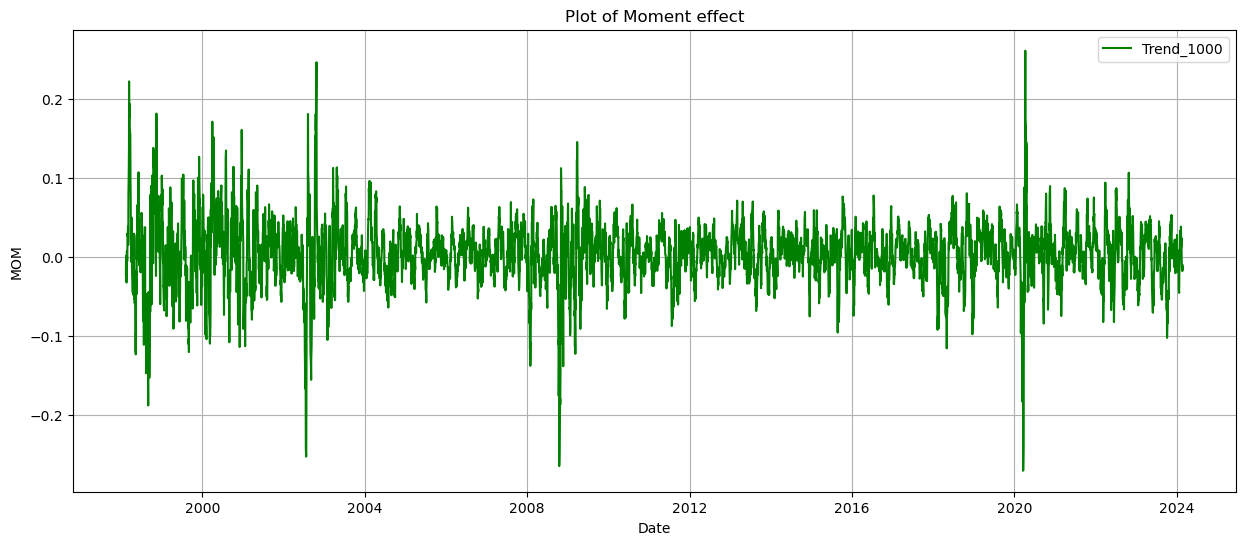

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [42]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [43]:
train.shape

(5551, 18)

In [44]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [45]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM','previousday' ] 

#### Retrain the models on the new predictors

In [46]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 17.25
MAPE: 0.10
minae: 0.00
maxae: 49.42
medae: 19.19

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 18.07
MAPE: 0.10
minae: 0.00
maxae: 49.91
medae: 20.73

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 18.22
MAPE: 0.11
minae: 0.00
maxae: 50.21
medae: 20.95

Learning rate set to 0.348972
0:	learn: 18.2246932	total: 3.62ms	remaining: 359ms
1:	learn: 12.2942945	total: 6.89ms	remaining: 338ms
2:	learn: 8.3456129	total: 9.78ms	remaining: 316ms
3:	learn: 5.8441341	total: 13ms	remaining: 313ms
4:	learn: 4.1089942	total: 16.2ms	remaining: 307ms
5:	learn: 3.0557629	total: 19.1ms	remaining: 299ms
6:	learn: 2.4167627	total: 23.5ms	remaining: 312ms
7:	learn: 2.0679741	total: 26.3ms	remaining: 302ms
8:	learn: 1.8330891	total: 29.2ms	remaining: 296ms
9:	learn: 1.7072545	total: 32.1ms	remaining: 289ms
10:	learn: 1.5991225	total: 35ms	remaining: 283ms
11:	learn: 1.5319

#### Improving the model

In [47]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [48]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [49]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [50]:
predictions_2 = backtest(new_data, model_2, predictors)

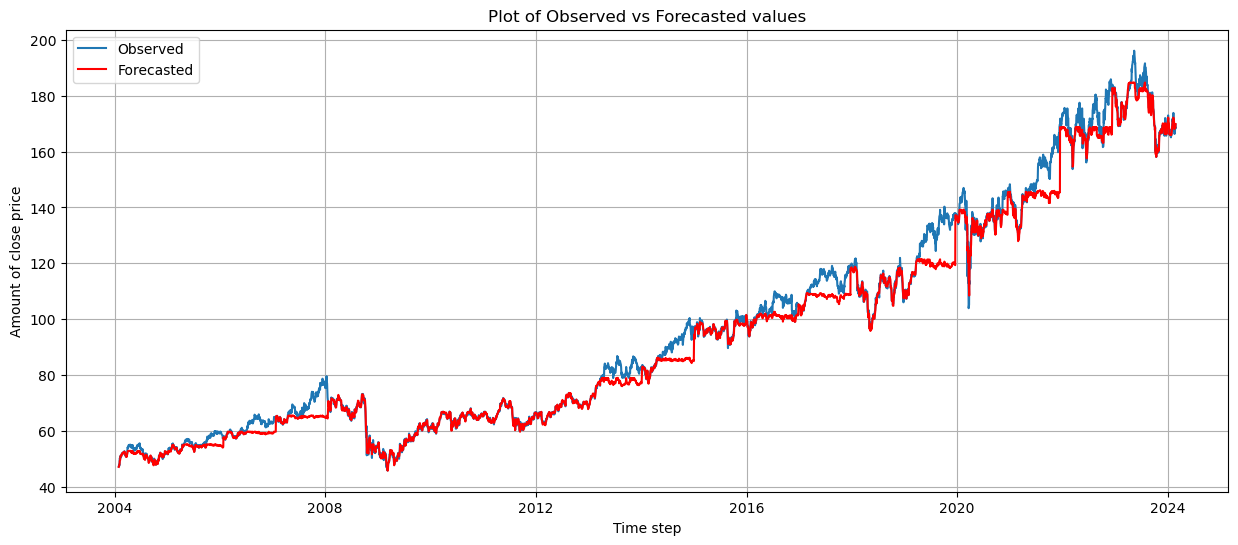

In [51]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [52]:
model_2.fit(train[predictors], train['close'])
prediction=model_2.predict(test[predictors])

In [53]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [54]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.10522139727473552

mean absolute  error is : 18.21969388956502



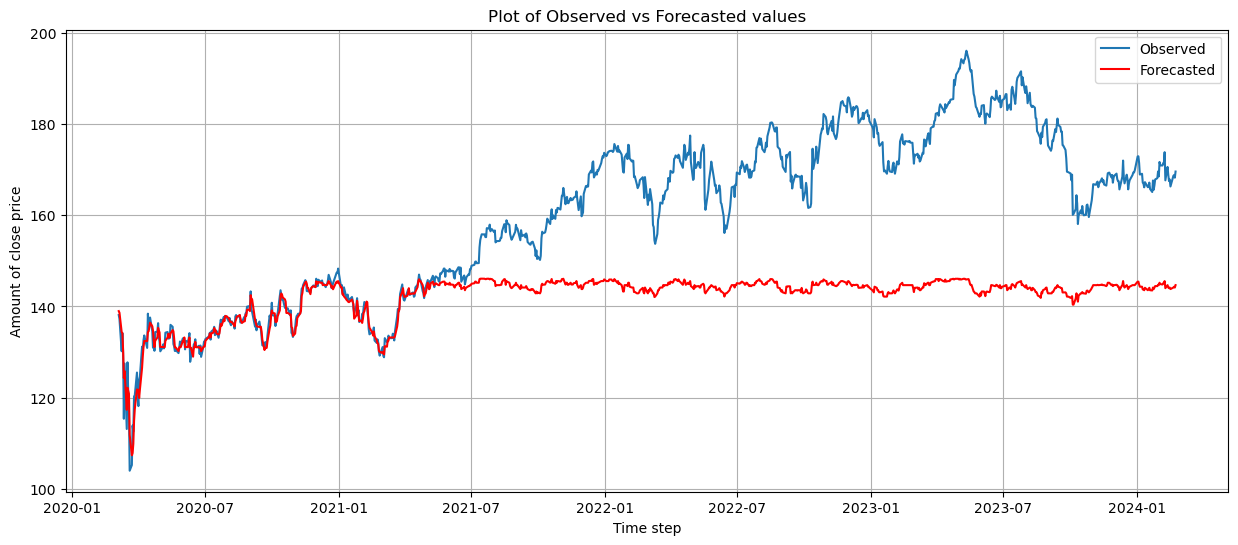

In [55]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [56]:
model = GradientBoostingRegressor(max_depth=7, n_estimators=350,  min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [57]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [58]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 18.11338756098858 
 gradientboost minae: 0.0029272172927790052 
 gradientboost maxae: 49.32152951271274 
 gradientboost medae: 20.6609998185902 
 gradientboost Mape: 0.10460435747651152 
  

 <-------------------------------------------------->



In [59]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2020-03-05,138.100006,137.665104
2020-03-06,137.259995,137.738129
2020-03-09,130.160004,134.754623
2020-03-10,134.139999,135.104069
2020-03-11,129.750000,130.524837
...,...,...
2024-02-16,166.320007,143.922604
2024-02-20,168.649994,144.347928
2024-02-21,168.830002,144.360169


In [60]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [61]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.10460435747651152

mean absolute  error is : 18.11338756098858



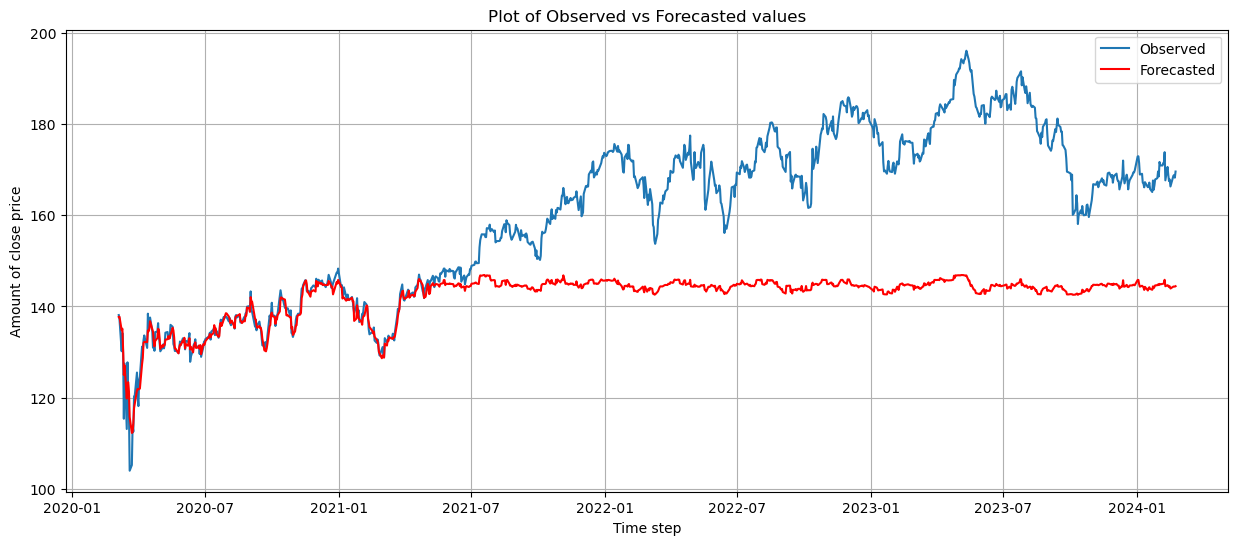

In [62]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [63]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 17.280600366799998 
 bagging minae: 0.0009997000000225853 
 bagging maxae: 49.55899210000001 
 bagging medae: 19.158501200000003 
 bagging Mape: 0.0997431007433408 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 0.7059311776241652 
 stacking minae: 0.0019443029241301701 
 stacking maxae: 9.536516276514973 
 stacking medae: 0.5188296312818181 
 stacking mape: 0.0045718222769421 



In [64]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [65]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [66]:
combined_bagg

,close,0
date,,
2020-03-05,138.100006,137.811998
2020-03-06,137.259995,137.731997
2020-03-09,130.160004,136.132001
2020-03-10,134.139999,133.708003
2020-03-11,129.750000,130.987999
...,...,...
2024-02-16,166.320007,145.738005
2024-02-20,168.649994,145.738005
2024-02-21,168.830002,145.738005


In [67]:
combined_stack

,close,0
date,,
2020-03-05,138.100006,137.590962
2020-03-06,137.259995,140.482734
2020-03-09,130.160004,132.919224
2020-03-10,134.139999,135.350019
2020-03-11,129.750000,129.854774
...,...,...
2024-02-16,166.320007,166.528315
2024-02-20,168.649994,168.407663
2024-02-21,168.830002,167.840294


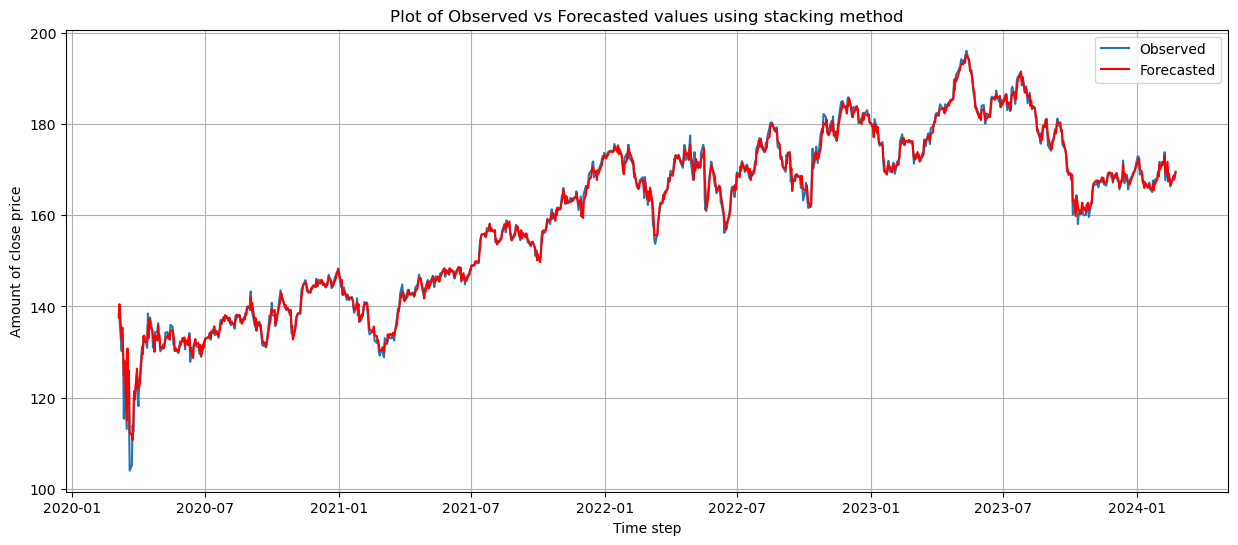

In [68]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

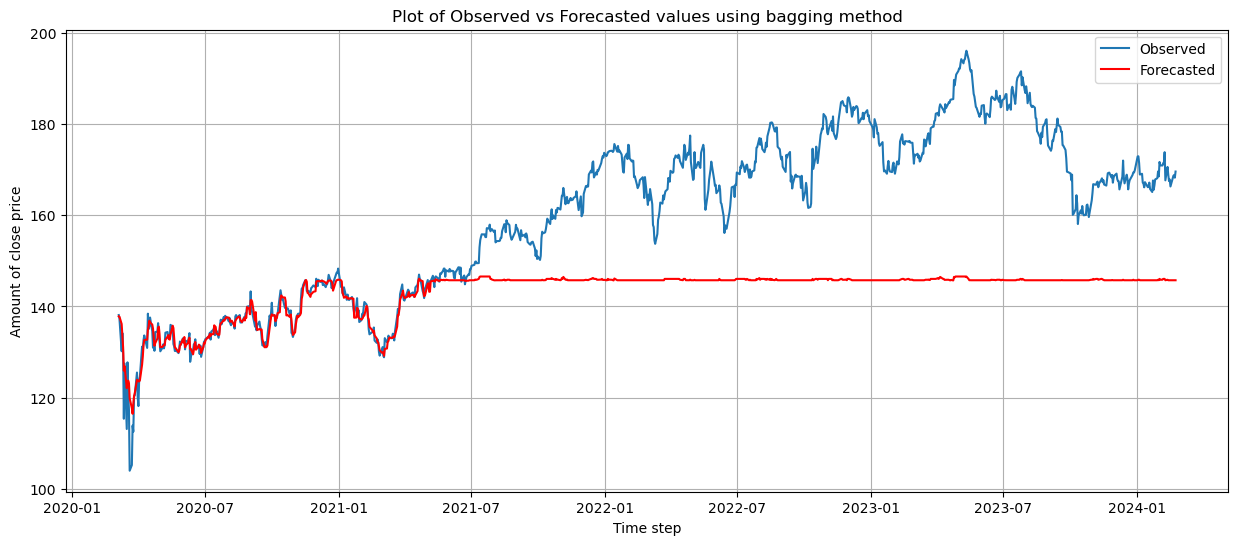

In [69]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

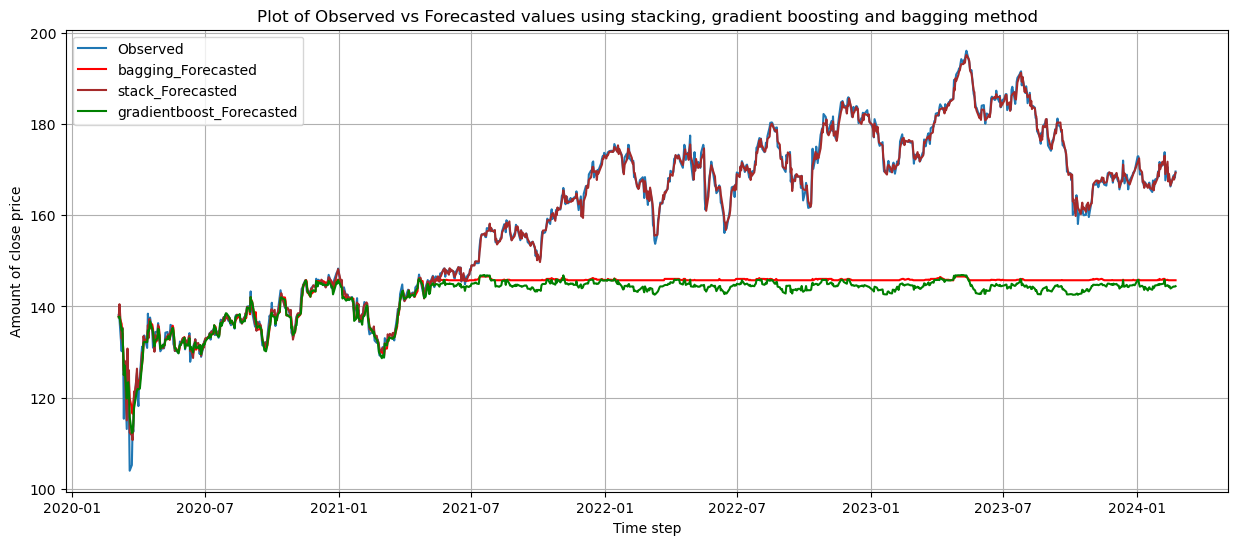

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('pepsiresult.png')
plt.show()

In [71]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 17.25, 0.10, 0.00, 49.42, 19.19])
task1_result.add_row(['XGboost', 18.07, 0.10, 0.00, 49.91, 20.73])
task1_result.add_row(['GradientBoost', 18.22, 0.11, 0.00, 50.21, 20.95 ])
task1_result.add_row(['Catboost', 19.38, 0.11, 0.02, 49.34, 22.97])
task1_result.add_row(['Bagging', 17.28, 0.10, 0.00, 49.56, 19.16])
task1_result.add_row(['Stacking', 0.72, 0.00, 0.00, 9.62, 0.53])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |    17.25    |     0.1      |      0.0      |     49.42     |     19.19     |
|    XGboost    |    18.07    |     0.1      |      0.0      |     49.91     |     20.73     |
| GradientBoost |    18.22    |     0.11     |      0.0      |     50.21     |     20.95     |
|    Catboost   |    19.38    |     0.11     |      0.02     |     49.34     |     22.97     |
|    Bagging    |    17.28    |     0.1      |      0.0      |     49.56     |     19.16     |
|    Stacking   |     0.72    |     0.0      |      0.0      |      9.62     |      0.53     |
+---------------+-------------+--------------+---------------+---------------+---------------+
